In [1]:
import matplotlib.pyplot as plt
import matplotlib
import joblib as jb
import numpy as np

plt.rcdefaults()

# Package versions
print("matplotlib version:", matplotlib.__version__)
print("joblib version:", jb.__version__)
print("numpy version:", np.__version__)

matplotlib version: 3.10.0
joblib version: 1.4.2
numpy version: 1.26.4



-----------------------------
Best params for LGBM were:
{'clf__n_estimators': 3000, 'clf__max_depth': 63, 'clf__colsample_bytree': 0.7886372708925217, 'clf__scale_pos_weight': 7.472410910017989, 'clf__learning_rate': 0.0007589929361363828, 'clf__reg_alpha': 0.0011885229743602958, 'clf__reg_lambda': 0.7041794245156696}

-----------------------------
Best params for CB were:
{'clf__iterations': 300, 'clf__depth': 7, 'clf__learning_rate': 0.016447215240493213, 'clf__l2_leaf_reg': 10.0, 'clf__bagging_temperature': 0.35291039954734355, 'clf__rsm': 1.0, 'clf__border_count': 57, 'clf__random_strength': 0.3154746916707655, 'clf__scale_pos_weight': 1.0}

-----------------------------
Best params for XGB were:
{'clf__n_estimators': 3000, 'clf__max_depth': 100, 'clf__colsample_bytree': 0.38867275660049133, 'clf__scale_pos_weight': 3.373826215843304, 'clf__learning_rate': 1e-06, 'clf__reg_alpha': 36.86986983077592, 'clf__reg_lambda': 0.01003796857359835}

-----------------------------
Best param

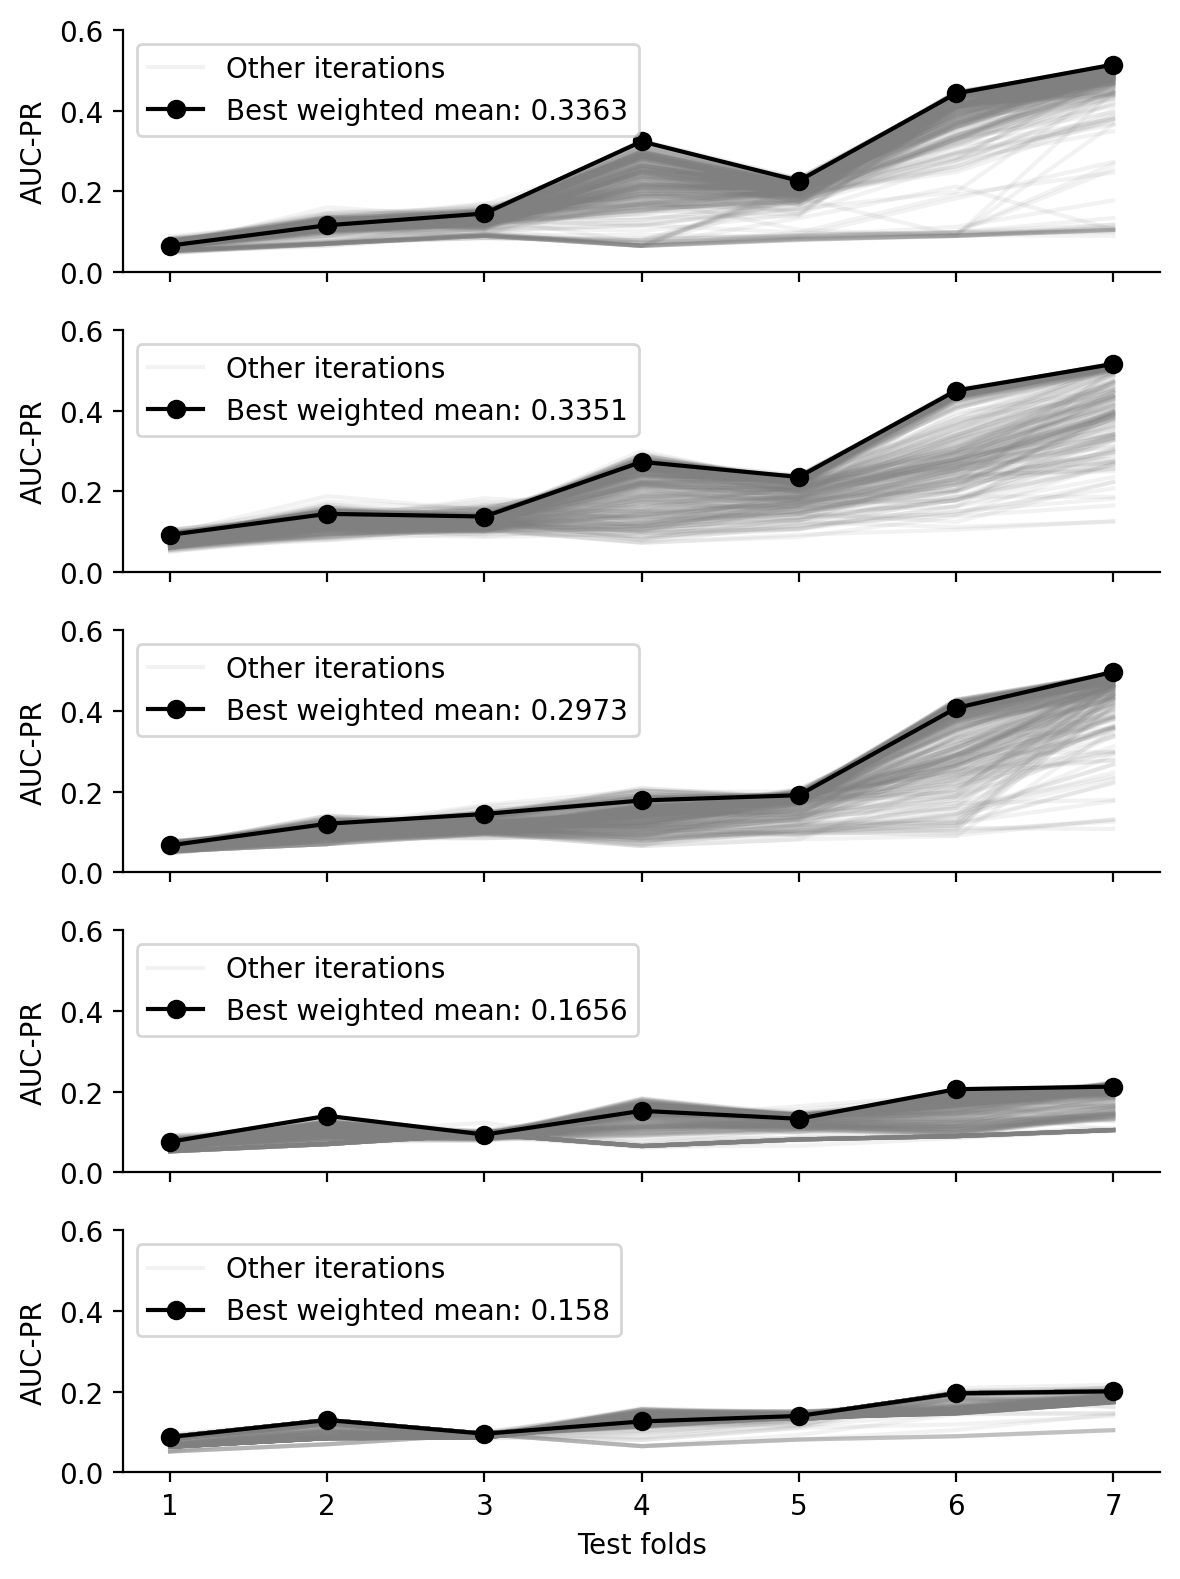

In [2]:
# Comparing models during hyperparameter tuning

models = ["LGBM", "CB", "XGB", "MLP", "LR"]

fig, axs = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(6, 8))
for i, model in enumerate(models):
    log = jb.load(model + "/objective_log.pkl")
    best_weighted_mean = 0
    for j, iteration in enumerate(log):
        if j == 0:
            axs[i].plot(range(1, len(iteration["scores"])+1), iteration["scores"], color="gray", alpha=.1, label="Other iterations")
        else:
            axs[i].plot(range(1, len(iteration["scores"])+1), iteration["scores"], color="gray", alpha=.1)
        if best_weighted_mean < iteration["weighted_mean"]:
            best_weighted_mean = iteration["weighted_mean"]
            best_scores = iteration["scores"]
            best_params = iteration["params"]
    axs[i].plot(range(1, len(best_scores)+1), best_scores, color="black", marker="o", label=f"Best weighted mean: {np.round(best_weighted_mean, 4)}")
    axs[i].legend(loc="upper left")
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_ylabel("AUC-PR")
    if i == 4:
        axs[i].set_xlabel("Test folds")
    # axs[i].annotate(f"Best weighted mean: {np.round(best_weighted_mean, 4)}", xy=(1, .4))
    print(f"\n-----------------------------\nBest params for {model} were:\n{best_params}")
plt.ylim(0, .6)
plt.tight_layout()
plt.savefig("comparing_models_hyp_tun.png", dpi=400)
plt.show()